In [16]:
import scipy.io as sio
import numpy as np
from control import TransferFunction, forced_response
import matplotlib.pyplot as plt


In [32]:
# Load the .mat file containing encoder_output
mat_data = sio.loadmat('/Users/michaelschool/Documents/GitHub/control_plots/data/encodervals.mat')


# Check if 'encoder_output' exists in the .mat file
if 'encoder_output' in mat_data:
    encoder_output = mat_data['encoder_output'].flatten()  # Flatten to 1D array
else:
    print("Warning: 'encoder_output' is not defined. Only model outputs will be plotted.")
    encoder_output = None

Input Area = 10.351799999999999 V·s
Steady-State Output Value = 15.26927082977818 Rotations
Calculated K = 1.4750353397262486


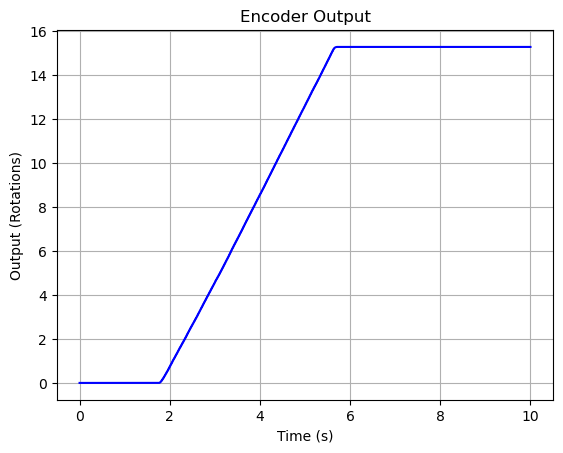

In [33]:
# Define time vector (assuming 4422 points from 0 to 10s)
n_points = 4422
t_max = 10
time = np.linspace(0, t_max, n_points)  # Generate time vector

# Define the pulse input with 2-second rest (for calculating input area)
pulse_magnitude = 2.7
pulse_start = 1.766
pulse_end = 5.6
pulse_duration = pulse_end - pulse_start
u = np.zeros_like(time)  # Create array of zeros with same shape as time
u[(time >= pulse_start) & (time <= pulse_end)] = pulse_magnitude  # Apply pulse

# Calculate input area
input_area = pulse_magnitude * pulse_duration  # 8.1
print(f"Input Area = {input_area} V·s")

# Calculate steady-state output value from encoder_output
idx_last_10percent = np.arange(int(0.9 * len(time)), len(time))  # Last 10% of indices
output_value = np.mean(encoder_output[idx_last_10percent])
print(f"Steady-State Output Value = {output_value} Rotations")

# Calculate K
K = output_value / input_area
print(f"Calculated K = {K}")

# Plot only the encoder output
plt.figure()
plt.plot(time, encoder_output, 'b-', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Encoder Output')
plt.grid(True)
plt.show()

Input Area = 10.351799999999999 V·s
Steady-State Output Value = 15.26927082977818 Rotations
Calculated K = 1.4750353397262486


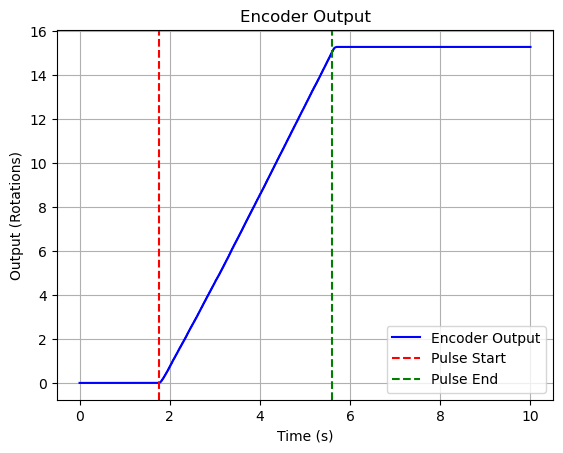

In [34]:
# Define time vector (assuming 4422 points from 0 to 10s)
n_points = 4422
t_max = 10
time = np.linspace(0, t_max, n_points)  # Generate time vector

# Define the pulse input with 2-second rest (for calculating input area)
pulse_magnitude = 2.7
pulse_start = 1.766
pulse_end = 5.6
pulse_duration = pulse_end - pulse_start
u = np.zeros_like(time)  # Create array of zeros with same shape as time
u[(time >= pulse_start) & (time <= pulse_end)] = pulse_magnitude  # Apply pulse

# Calculate input area
input_area = pulse_magnitude * pulse_duration  # 8.1
print(f"Input Area = {input_area} V·s")

# Calculate steady-state output value from encoder_output
idx_last_10percent = np.arange(int(0.9 * len(time)), len(time))  # Last 10% of indices
output_value = np.mean(encoder_output[idx_last_10percent])
print(f"Steady-State Output Value = {output_value} Rotations")

# Calculate K
K = output_value / input_area
print(f"Calculated K = {K}")

# Plot the encoder output with vertical lines at pulse start and end
plt.figure()
plt.plot(time, encoder_output, 'b-', linewidth=1.5, label="Encoder Output")
plt.axvline(x=pulse_start, color='r', linestyle='--', label="Pulse Start")
plt.axvline(x=pulse_end, color='g', linestyle='--', label="Pulse End")
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Encoder Output')
plt.legend()
plt.grid(True)
plt.show()

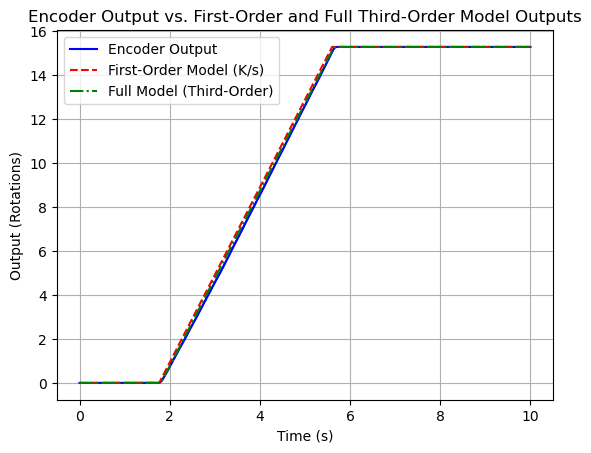

In [35]:
# Define time vector (assuming 4422 points from 0 to 10s)
n_points = 4422
t_max = 10
time = np.linspace(0, t_max, n_points)  # Generate time vector

# Define the pulse input with 2-second rest
pulse_magnitude = 2.7
pulse_start = 1.766
pulse_end = 5.6
pulse_duration = pulse_end - pulse_start
u = np.zeros_like(time)  # Create array of zeros with same shape as time
u[(time >= pulse_start) & (time <= pulse_end)] = pulse_magnitude  # Apply pulse

# Define system parameters
K = 1.4750353397262486
wn = 49
zeta = 1

# First-order model: G(s) = K/s
# In MATLAB: G_first = tf([K], [1 0])
G_first = TransferFunction([K], [1, 0])

# Second-order component: G(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
# In MATLAB: G_second = tf([wn^2], [1 2*zeta*wn wn^2])
G_second = TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

# Full third-order model: G(s) = (K/s) * (second-order system)
# In MATLAB: G_full = series(G_first, G_second)
G_full = G_first * G_second  # Multiplication of transfer functions in Python

# Simulate responses
# In MATLAB: y_first = lsim(G_first, u, time)
_, y_first = forced_response(G_first, T=time, U=u)

# In MATLAB: y_full = lsim(G_full, u, time)
_, y_full = forced_response(G_full, T=time, U=u)

# Plotting
plt.figure()

# Check if encoder_output exists before plotting
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')

# Plot the simulated responses
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')

# Configure plot aesthetics
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Encoder Output vs. First-Order and Full Third-Order Model Outputs')
plt.legend()
plt.grid(True)
plt.show()

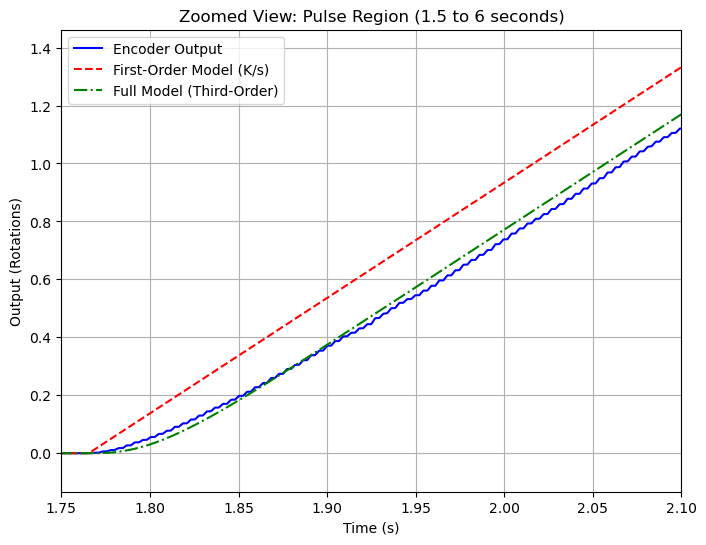

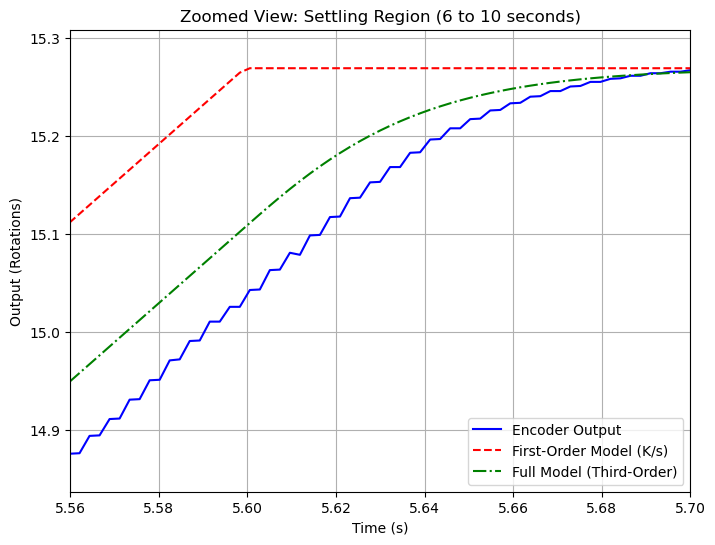

In [36]:
# First Plot: Zoom into the pulse region (1.5 to 6 seconds)
plt.figure(figsize=(8, 6))
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Zoomed View: Pulse Region (1.5 to 6 seconds)')
plt.legend()
plt.grid(True)

# Zoom into the pulse region
zoom_start_1 = 1.75
zoom_end_1 = 2.1
plt.xlim(zoom_start_1, zoom_end_1)

# Find the y-axis range in the zoomed region
mask_1 = (time >= zoom_start_1) & (time <= zoom_end_1)
y_first_zoom_1 = y_first[mask_1]
y_full_zoom_1 = y_full[mask_1]
if encoder_output is not None:
    encoder_output_zoom_1 = encoder_output[mask_1]
    y_min_1 = min(y_first_zoom_1.min(), y_full_zoom_1.min(), encoder_output_zoom_1.min())
    y_max_1 = max(y_first_zoom_1.max(), y_full_zoom_1.max(), encoder_output_zoom_1.max())
else:
    y_min_1 = min(y_first_zoom_1.min(), y_full_zoom_1.min())
    y_max_1 = max(y_first_zoom_1.max(), y_full_zoom_1.max())

# Add some padding to the y-axis limits
padding_1 = 0.1 * (y_max_1 - y_min_1)
plt.ylim(y_min_1 - padding_1, y_max_1 + padding_1)

# Second Plot: Zoom into the settling region (6 to 10 seconds)
plt.figure(figsize=(8, 6))
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Zoomed View: Settling Region (6 to 10 seconds)')
plt.legend()
plt.grid(True)

# Zoom into the settling region
zoom_start_2 = 5.56
zoom_end_2 = 5.7
plt.xlim(zoom_start_2, zoom_end_2)

# Find the y-axis range in the zoomed region
mask_2 = (time >= zoom_start_2) & (time <= zoom_end_2)
y_first_zoom_2 = y_first[mask_2]
y_full_zoom_2 = y_full[mask_2]
if encoder_output is not None:
    encoder_output_zoom_2 = encoder_output[mask_2]
    y_min_2 = min(y_first_zoom_2.min(), y_full_zoom_2.min(), encoder_output_zoom_2.min())
    y_max_2 = max(y_first_zoom_2.max(), y_full_zoom_2.max(), encoder_output_zoom_2.max())
else:
    y_min_2 = min(y_first_zoom_2.min(), y_full_zoom_2.min())
    y_max_2 = max(y_first_zoom_2.max(), y_full_zoom_2.max())

# Add some padding to the y-axis limits
padding_2 = 0.1 * (y_max_2 - y_min_2)
plt.ylim(y_min_2 - padding_2, y_max_2 + padding_2)

# Show both plots
plt.show()